In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load and normalize the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8664 - loss: 0.4636
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9630 - loss: 0.1160
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0714
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9847 - loss: 0.0488
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0410


In [2]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9691 - loss: 0.0984
0.09039362519979477 0.9726999998092651


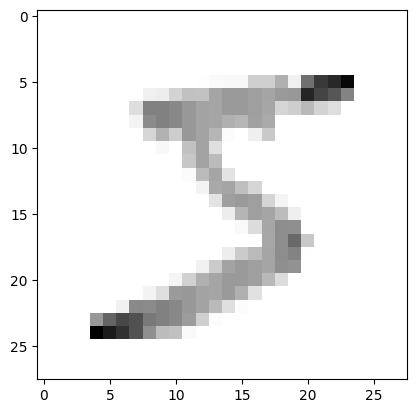

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [17]:
model.save('num_recognition.keras')

In [5]:
from tensorflow.keras.models import load_model
import tensorflow as tf

def softmax_v2(x):
    return tf.nn.softmax(x)

new_model = load_model('num_recognition.h5', custom_objects={'softmax_v2': softmax_v2})

In [6]:
prediction = new_model.predict([x_test])

127/313 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step

c:\Users\monil\anaconda3\envs\ML\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


c:\Users\monil\anaconda3\envs\ML\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


In [15]:
import numpy as np
print(np.argmax(prediction[120]))

5


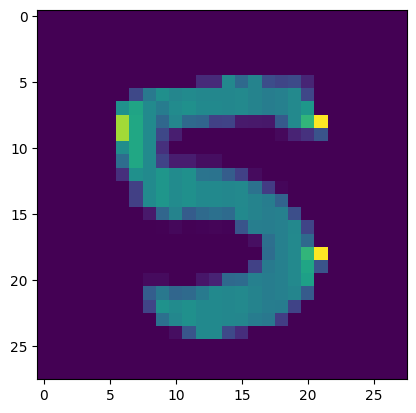

In [14]:
plt.imshow(x_test[120])
plt.show()